In [1]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import chardet
import io
from sklearn import preprocessing
import numpy as np
from sklearn.preprocessing import FunctionTransformer
import numpy as np
from sklearn.preprocessing import power_transform
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from collections import defaultdict
from scipy.stats.stats import pearsonr
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.cluster import DBSCAN
from sklearn import datasets 
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import DBSCAN 
from sklearn.metrics import pairwise_distances 
from sklearn.neighbors import NearestNeighbors 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics  

#### Reinserire percorso dataset!!!

In [2]:
df = pd.read_csv(r'C:\Users\Mario\OneDrive\Documenti\UNIPI\Data Mining 1\Project\Train_HR_Employee_Attrition.csv')
#df = pd.read_csv(r'file:/Users/AlessandroVavala/Desktop/Alessandro/Università/UniPi/Data Mining/DatasetProject1/Train_HR_Employee_Attrition.csv')

## Preparativi

In [3]:
#MonthlyIncome
df['MonthlyIncome'] = df['MonthlyIncome'].fillna(df.groupby('JobRole')['MonthlyIncome'].transform('mean'))
#Age
df['Age'] = df['Age'].fillna(df.groupby('JobRole')['Age'].transform('mean'))
#Over18
df["Over18"].fillna("Y", inplace = True) 
#Gender
df["Gender"].fillna("Male", inplace = True)
#BusinessTravel
df["BusinessTravel"].fillna("Travel_Rarely", inplace = True)
#StandardHours
df["StandardHours"].fillna(float("80.0"), inplace = True)
#PerformanceRating
df['PerformanceRating'] = df.groupby(['JobRole'], sort=False)['PerformanceRating'].apply(lambda x: x.fillna(x.mode().iloc[0])) 
#TRAININGLASTYEAR
df['TrainingTimesLastYear'] = df['TrainingTimesLastYear'].fillna(df.groupby('JobRole')['TrainingTimesLastYear'].transform('mean'))
#YEARS AT COMPANY
df['YearsAtCompany'] = df['YearsAtCompany'].fillna(df.groupby('JobRole')['YearsAtCompany'].transform('mean'))
df.round({"Age" : 0 , "MonthlyIncome": 2 , "TrainingTimesLastYear" : 0 , "YearsAtCompany" : 0  })

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,52.0,No,Travel_Rarely,593,Research & Development,9,4,Medical,2,Male,...,3,80.0,0,20,2.0,2,8.0,7,2,13
1,36.0,No,Travel_Rarely,1218,Research & Development,1,1,Life Sciences,2,Male,...,3,80.0,1,21,3.0,3,1.0,8,1,6
2,37.0,No,Travel_Frequently,530,Sales,16,3,Life Sciences,3,Male,...,3,80.0,1,7,4.0,3,1.0,5,1,2
3,33.0,No,Travel_Rarely,953,Research & Development,5,4,Technical Degree,2,Male,...,2,80.0,0,12,1.0,3,3.0,7,0,7
4,37.0,No,Travel_Rarely,1380,Research & Development,9,2,Life Sciences,3,Female,...,3,80.0,0,2,3.0,3,10.0,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,37.0,No,Travel_Rarely,1123,Research & Development,16,2,Medical,4,Female,...,2,80.0,2,1,3.0,2,17.0,0,0,0
1172,33.0,Yes,Non-Travel,249,Sales,6,4,Life Sciences,2,Female,...,2,80.0,0,12,2.0,2,11.0,7,7,7
1173,33.0,No,Travel_Rarely,583,Sales,4,1,Marketing,3,Male,...,1,80.0,0,5,2.0,4,3.0,2,0,3
1174,45.0,No,Non-Travel,1174,Sales,3,4,Marketing,1,Male,...,4,80.0,0,15,2.0,3,10.0,4,0,1


In [4]:
#OUTLIERS FOR MonthlyIncome
"""SD MonthlyIncome"""
MonthlyIncome_std = df ['MonthlyIncome'].std()
MonthlyIncome_std
"""MEAN MonthlyIncome"""
MonthlyIncome_mean = df ['MonthlyIncome'].mean()
MonthlyIncome_mean
threshold = 3
outlier = [] 
for i in df ['MonthlyIncome']: 
    z = (i-MonthlyIncome_mean)/MonthlyIncome_std 
    if z >= threshold: 
        outlier.append(i)
        df = df[~df.MonthlyIncome.isin(outlier)]

#OUTLIERS FOR TotalWorkingYears
"""SD TotalWorkingYears"""
TotalWorkingYears_std = df ['TotalWorkingYears'].std()
"""MEAN TotalWorkingYears"""
TotalWorkingYears_mean = df ['TotalWorkingYears'].mean()
threshold = 3
outlier = [] 
for i in df ['TotalWorkingYears']: 
    z = (i-TotalWorkingYears_mean)/TotalWorkingYears_std 
    if z >= threshold: 
        outlier.append(i)
        df = df[~df.TotalWorkingYears.isin(outlier)]

#OUTLIERS FOR YearsAtCompany
"""SD YearsAtCompany"""
YearsAtCompany_std = df ['YearsAtCompany'].std()
"""MEAN YearsAtCompany"""
YearsAtCompany_mean = df ['YearsAtCompany'].mean()
threshold = 3
outlier = [] 
for i in df ['YearsAtCompany']: 
    z = (i-YearsAtCompany_mean)/YearsAtCompany_std 
    if z >= threshold: 
        outlier.append(i) 
        df = df[~df.YearsAtCompany.isin(outlier)]

#OUTLIERS FOR YearsInCurrentRole
"""SD YearsInCurrentRole"""
YearsInCurrentRole_std = df ['YearsInCurrentRole'].std()
"""MEAN YearsInCurrentRole"""
YearsInCurrentRole_mean = df ['YearsInCurrentRole'].mean()
threshold = 3
outlier = [] 
for i in df ['YearsInCurrentRole']: 
    z = (i-YearsInCurrentRole_mean)/YearsInCurrentRole_std 
    if z >= threshold: 
        outlier.append(i) 
        df = df[~df.YearsInCurrentRole.isin(outlier)]
 
#OUTLIERS FOR YearsSinceLastPromotion
"""SD YearsSinceLastPromotion"""
YearsSinceLastPromotion_std = df ['YearsSinceLastPromotion'].std()
"""MEAN YearsSinceLastPromotion"""
YearsSinceLastPromotion_mean = df ['YearsSinceLastPromotion'].mean()
threshold = 3
outlier = [] 
for i in df ['YearsSinceLastPromotion']: 
    z = (i-YearsSinceLastPromotion_mean)/YearsSinceLastPromotion_std 
    if z >= threshold: 
        outlier.append(i) 
        df = df[~df.YearsSinceLastPromotion.isin(outlier)]
 
#OUTLIERS FOR YearsWithCurrManager
"""SD YearsWithCurrManager"""
YearsWithCurrManager_std = df ['YearsWithCurrManager'].std()
"""MEAN YearsWithCurrManager"""
YearsWithCurrManager_mean = df ['YearsWithCurrManager'].mean()
threshold = 3
outlier = [] 
for i in df ['YearsWithCurrManager']: 
    z = (i-YearsWithCurrManager_mean)/YearsWithCurrManager_std 
    if z >= threshold: 
        outlier.append(i) 
        df = df[~df.YearsWithCurrManager.isin(outlier)]

In [5]:
print('Numero outlier rimossi: ', 1176 - len(df))
len(df)

Numero outlier rimossi:  97


1079

In [6]:
#Convertiamo Attrition 
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df['BusinessTravel'] = df['BusinessTravel'].map({'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2})
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No':0})
# Encoding categorical variables
df = pd.get_dummies(df, columns=['MaritalStatus'])

In [7]:
df = df.drop(columns = 'StandardHours')
df = df.drop(columns = 'HourlyRate')
df = df.drop(columns = 'DailyRate')
df = df.drop(columns = 'MonthlyRate')
df = df.drop(columns = 'BusinessTravel')
df = df.drop(columns = 'Education')
df = df.drop(columns = 'YearsInCurrentRole')
df = df.drop(columns = 'JobLevel')

In [8]:
#mi salvo una copia del dataframe in dk
dk = df.copy()
#prendo solo le colonne numeriche
data_num = dk.select_dtypes(exclude=['object'])

In [9]:
#Correlation with output variable
cor = data_num.corr()
cor_target = abs(cor["Attrition"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.15]
relevant_features

Attrition               1.000000
JobInvolvement          0.150744
OverTime                0.245701
TotalWorkingYears       0.172763
YearsWithCurrManager    0.180115
MaritalStatus_Single    0.176507
Name: Attrition, dtype: float64

Dopo l'encoding MaritalStatus_SIngle compare tra le correlazioni sopra 0.15

In [10]:
scaler = StandardScaler()
X = scaler.fit_transform(dk[relevant_features[0:6].keys()].values)
X
dk_scaled = pd.DataFrame(X, columns = relevant_features[0:6].keys())
dk_scaled


,Attrition,JobInvolvement,OverTime,TotalWorkingYears,YearsWithCurrManager,MaritalStatus_Single
0,-0.457866,0.364642,-0.640670,1.438880,2.785567,1.434105
1,-0.457866,0.364642,1.560867,1.585651,0.665729,-0.697299
2,-0.457866,0.364642,1.560867,-0.469153,-0.545606,-0.697299
3,-0.457866,0.364642,-0.640670,0.264706,0.968563,1.434105
4,-0.457866,0.364642,-0.640670,-1.203011,-0.848440,1.434105
...,...,...,...,...,...,...
1074,-0.457866,1.759850,1.560867,-1.349783,-1.151274,-0.697299
1075,2.184045,-2.425774,1.560867,0.264706,0.968563,-0.697299
1076,-0.457866,-1.030566,-0.640670,-0.762696,-0.242772,-0.697299
1077,-0.457866,0.364642,1.560867,0.705021,-0.848440,1.434105


E' necessario tenere Attrition, perché quando andiamo a fare k-means con k=2 i due cluster si adattano automaticamente a Yes o No di Attrition (più avanti si vede). 
Se togliamo Attrition i due cluster si distribuiscono in maniera differente tra gli attributi, perciò quando andiamo a fare il loc per i grafici stiamo legando verde e rosso ai nuovi cluster che non dipendono più da Attrition. 

In più se manteniamo Attrition la silhouette suggerisce k=2 tra i valori accettabili (i più bassi). Senza Attrition cambia completamente e sarebbe difficile giustificare la nostra scelta.


# Clustering

## K-Means

#### Ricerca di K

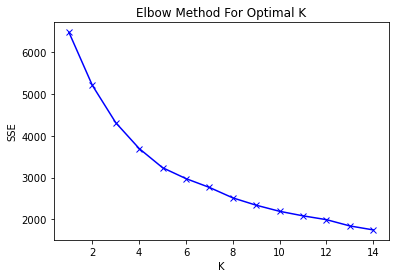

In [11]:
#Elbow method

sse = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(dk_scaled)
    sse.append(km.inertia_)
    
plt.plot(K, sse, 'bx-')
plt.xlabel('K')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal K')
plt.show()

In [12]:
#Silhouette metric

k_to_test = range(2,25,1) # [2,3,4, ..., 24]
silhouette_scores = {}

for k in k_to_test:
    kmeans = KMeans(n_clusters = k, random_state=123)
    kmeans.fit(dk_scaled)
    labels_k = kmeans.labels_
    score_k = metrics.silhouette_score(dk_scaled, labels_k)
    silhouette_scores[k] = score_k
    print("Tested kMeans with k = %d\tSS: %5.4f" % (k, score_k))

Tested kMeans with k = 2	SS: 0.3014
Tested kMeans with k = 3	SS: 0.2234
Tested kMeans with k = 4	SS: 0.2479
Tested kMeans with k = 5	SS: 0.2683
Tested kMeans with k = 6	SS: 0.2620
Tested kMeans with k = 7	SS: 0.2730
Tested kMeans with k = 8	SS: 0.2871
Tested kMeans with k = 9	SS: 0.3005
Tested kMeans with k = 10	SS: 0.3115
Tested kMeans with k = 11	SS: 0.3186
Tested kMeans with k = 12	SS: 0.3377
Tested kMeans with k = 13	SS: 0.3345
Tested kMeans with k = 14	SS: 0.3499
Tested kMeans with k = 15	SS: 0.3620
Tested kMeans with k = 16	SS: 0.3673
Tested kMeans with k = 17	SS: 0.3702
Tested kMeans with k = 18	SS: 0.3627
Tested kMeans with k = 19	SS: 0.3747
Tested kMeans with k = 20	SS: 0.3660
Tested kMeans with k = 21	SS: 0.3691
Tested kMeans with k = 22	SS: 0.3731
Tested kMeans with k = 23	SS: 0.3825
Tested kMeans with k = 24	SS: 0.3803


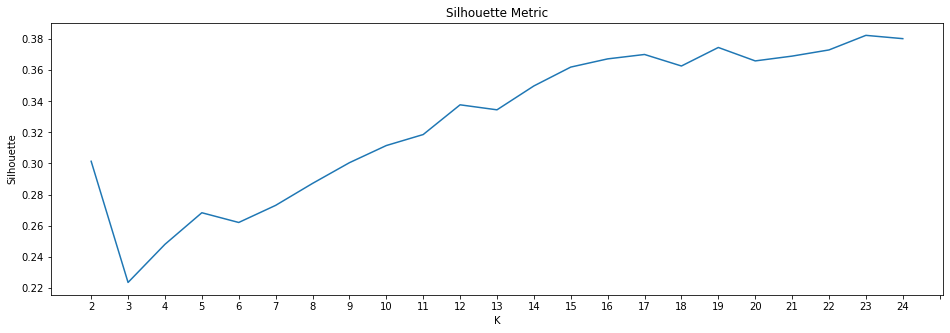

In [13]:
#Visualizziamo la silhouette

sil_scores = list(silhouette_scores.values())

plt.figure(figsize = (16,5))
plt.plot(sil_scores)
plt.xticks(range(0,24,1), silhouette_scores.keys())
plt.title("Silhouette Metric")
plt.xlabel("K")
plt.ylabel("Silhouette")
plt.show()

#### Visualization of clusters centers by means of parallel coordinates

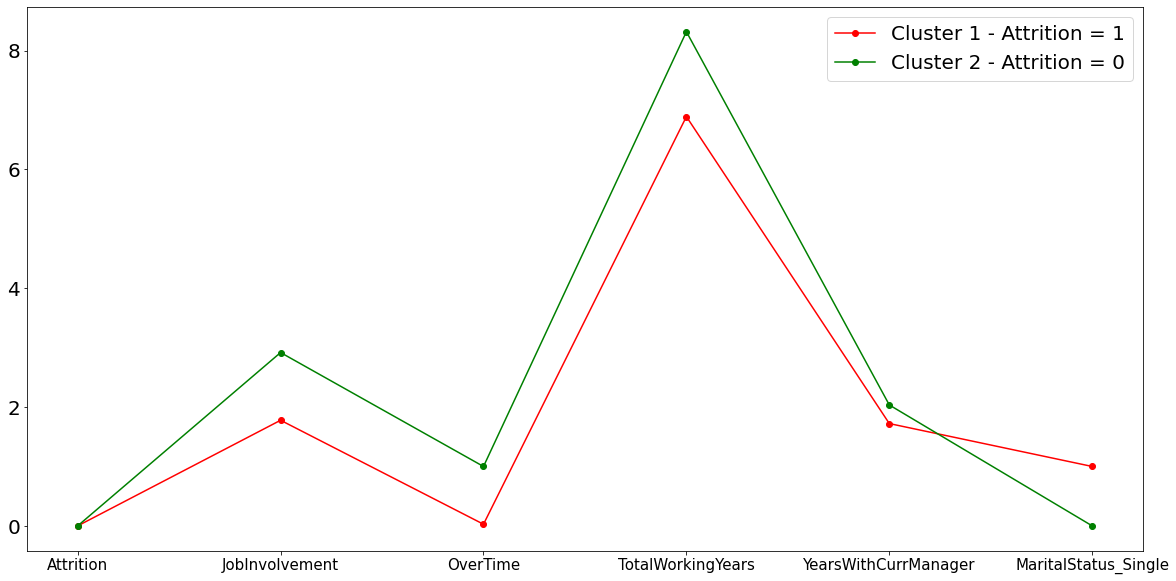

In [14]:
#Attenzione a fare un run solo, altrimenti cerca altri centers e cambia il grafico

centers = scaler.inverse_transform(kmeans.cluster_centers_)
fig = plt.figure(figsize=(20, 10)) 
fig_dims = (1, 1)

# Plot 
plt.subplot2grid(fig_dims, (0, 0))
plt.plot(centers[0], marker='o', label='Cluster 1 - Attrition = 1', color = 'red')
plt.plot(centers[1], marker='o', label='Cluster 2 - Attrition = 0', color = 'green')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xticks(range(0, len(dk_scaled.columns)), dk_scaled.columns, fontsize=15)
plt.legend(fontsize=20)
plt.show()

# essendo tutte negativamente correlate (ad eccezione di MaritalStatus_Single), posso vedere come i grafici non si intersichino mai


In [15]:
kmeans = KMeans(n_clusters = 2, max_iter=3000, random_state=123)
kmeans.fit(X)
centroids = kmeans.cluster_centers_
dk_scaled['label'] = kmeans.labels_
dk['label'] = kmeans.labels_
#df['label'] = kmeans.labels_

dk_scaled.head(50)

,Attrition,JobInvolvement,OverTime,TotalWorkingYears,YearsWithCurrManager,MaritalStatus_Single,label
0,-0.457866,0.364642,-0.640670,1.438880,2.785567,1.434105,1
1,-0.457866,0.364642,1.560867,1.585651,0.665729,-0.697299,1
2,-0.457866,0.364642,1.560867,-0.469153,-0.545606,-0.697299,1
3,-0.457866,0.364642,-0.640670,0.264706,0.968563,1.434105,1
4,-0.457866,0.364642,-0.640670,-1.203011,-0.848440,1.434105,1
5,-0.457866,1.759850,-0.640670,-0.909468,-0.242772,-0.697299,1
6,-0.457866,0.364642,-0.640670,-0.615924,-0.545606,-0.697299,1
7,-0.457866,0.364642,-0.640670,0.411478,1.574231,-0.697299,1
8,-0.457866,0.364642,-0.640670,1.292108,2.785567,-0.697299,1
9,-0.457866,1.759850,1.560867,-0.615924,0.060062,-0.697299,1


Come si può vedere sopra k=2 ha legato i cluster a Attrition (cluster 0 = Yes; cluster 1 = No). 
La standardizzazione ha cambiato anche i valori binari ma non dovrebbe essere un problema. 

In [16]:
#Per visualizzare k-means con k=2 su tutti gli attributi (molto lento)

#sns.pairplot(data = dk_scaled, hue = "label", palette = "Accent_r")
#plt.show()

In [17]:
#Funzione per jitter

def rand_jitter(arr):
    stdev = .05*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

Visualizzaziomo il clustering tra Attrition e gli altri attributi 

In [18]:
#Colori rosso e verde per attrition

def colori(arr):
    cols = []
    for i in arr:
        if i==1:
            cols.append('green')
        else:
            cols.append('red')
    return cols

colors = colori(dk['label'])

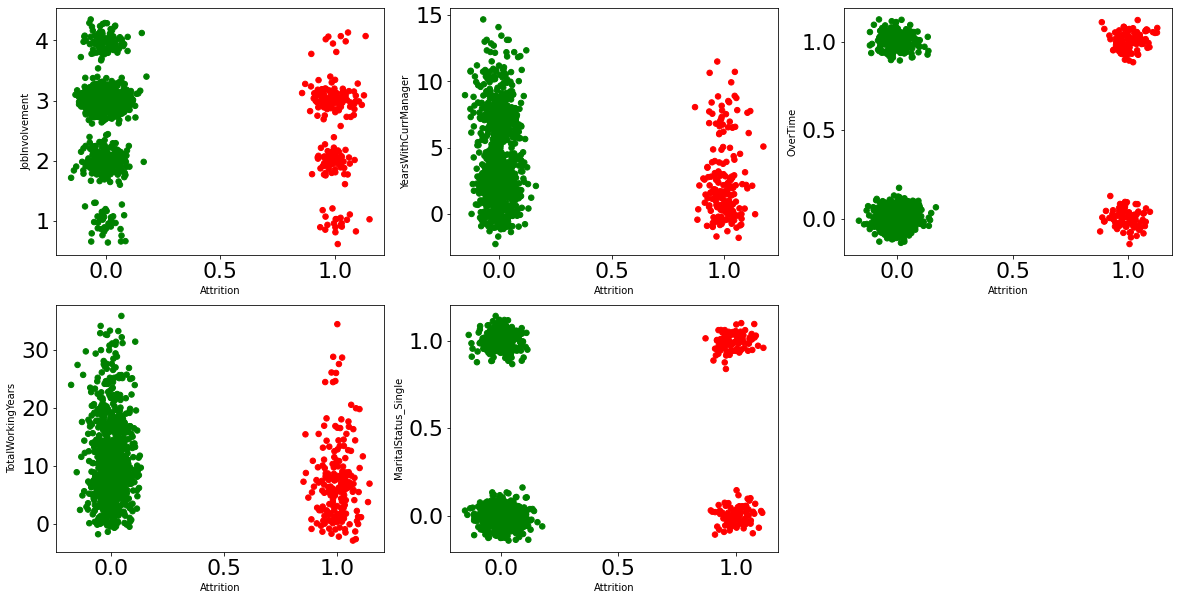

In [19]:
fig = plt.figure(figsize=(20, 10)) 
fig_dims = (2, 3)

plt.subplot2grid(fig_dims, (0, 0))
plt.scatter(rand_jitter(df['Attrition']), rand_jitter(df['JobInvolvement']), c=colors, s=30)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('Attrition')
plt.ylabel('JobInvolvement')

plt.subplot2grid(fig_dims, (0, 1))
plt.scatter(rand_jitter(df['Attrition']), rand_jitter(df['YearsWithCurrManager']), c=colors, s=30)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('Attrition')
plt.ylabel('YearsWithCurrManager')

plt.subplot2grid(fig_dims, (0, 2))
plt.scatter(rand_jitter(df['Attrition']), rand_jitter(df['OverTime']), c=colors, s=30)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('Attrition')
plt.ylabel('OverTime')

plt.subplot2grid(fig_dims, (1, 0))
plt.scatter(rand_jitter(df['Attrition']), rand_jitter(df['TotalWorkingYears']), c=colors, s=30)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('Attrition')
plt.ylabel('TotalWorkingYears')

plt.subplot2grid(fig_dims, (1, 1))
plt.scatter(rand_jitter(df['Attrition']), rand_jitter(df['MaritalStatus_Single']), c=colors, s=30)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('Attrition')
plt.ylabel('MaritalStatus_Single')

plt.show()